<h1>Air Quality and Pollution Assessment <h1>


In [15]:
import pandas as pd

In [16]:
ds = pd.read_csv('pollution_dataset.csv')

The goal of this analysis is to develop a predictive model that can assess air quality levels in various regions based on multiple environmental and demographic factors

In [17]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


<h3>Data Exploration<h3>

Exploratory Data Analysis (EDA)
--------------------------------------------------

1. Basic Data Information:

Dataset Shape: (5000, 10)

Data Types:
Temperature                      float64
Humidity                         float64
PM2.5                            float64
PM10                             float64
NO2                              float64
SO2                              float64
CO                               float64
Proximity_to_Industrial_Areas    float64
Population_Density                 int64
Air Quality                       object
dtype: object

Missing Values:
Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

2. Descriptive Statistics:
       Temperatur

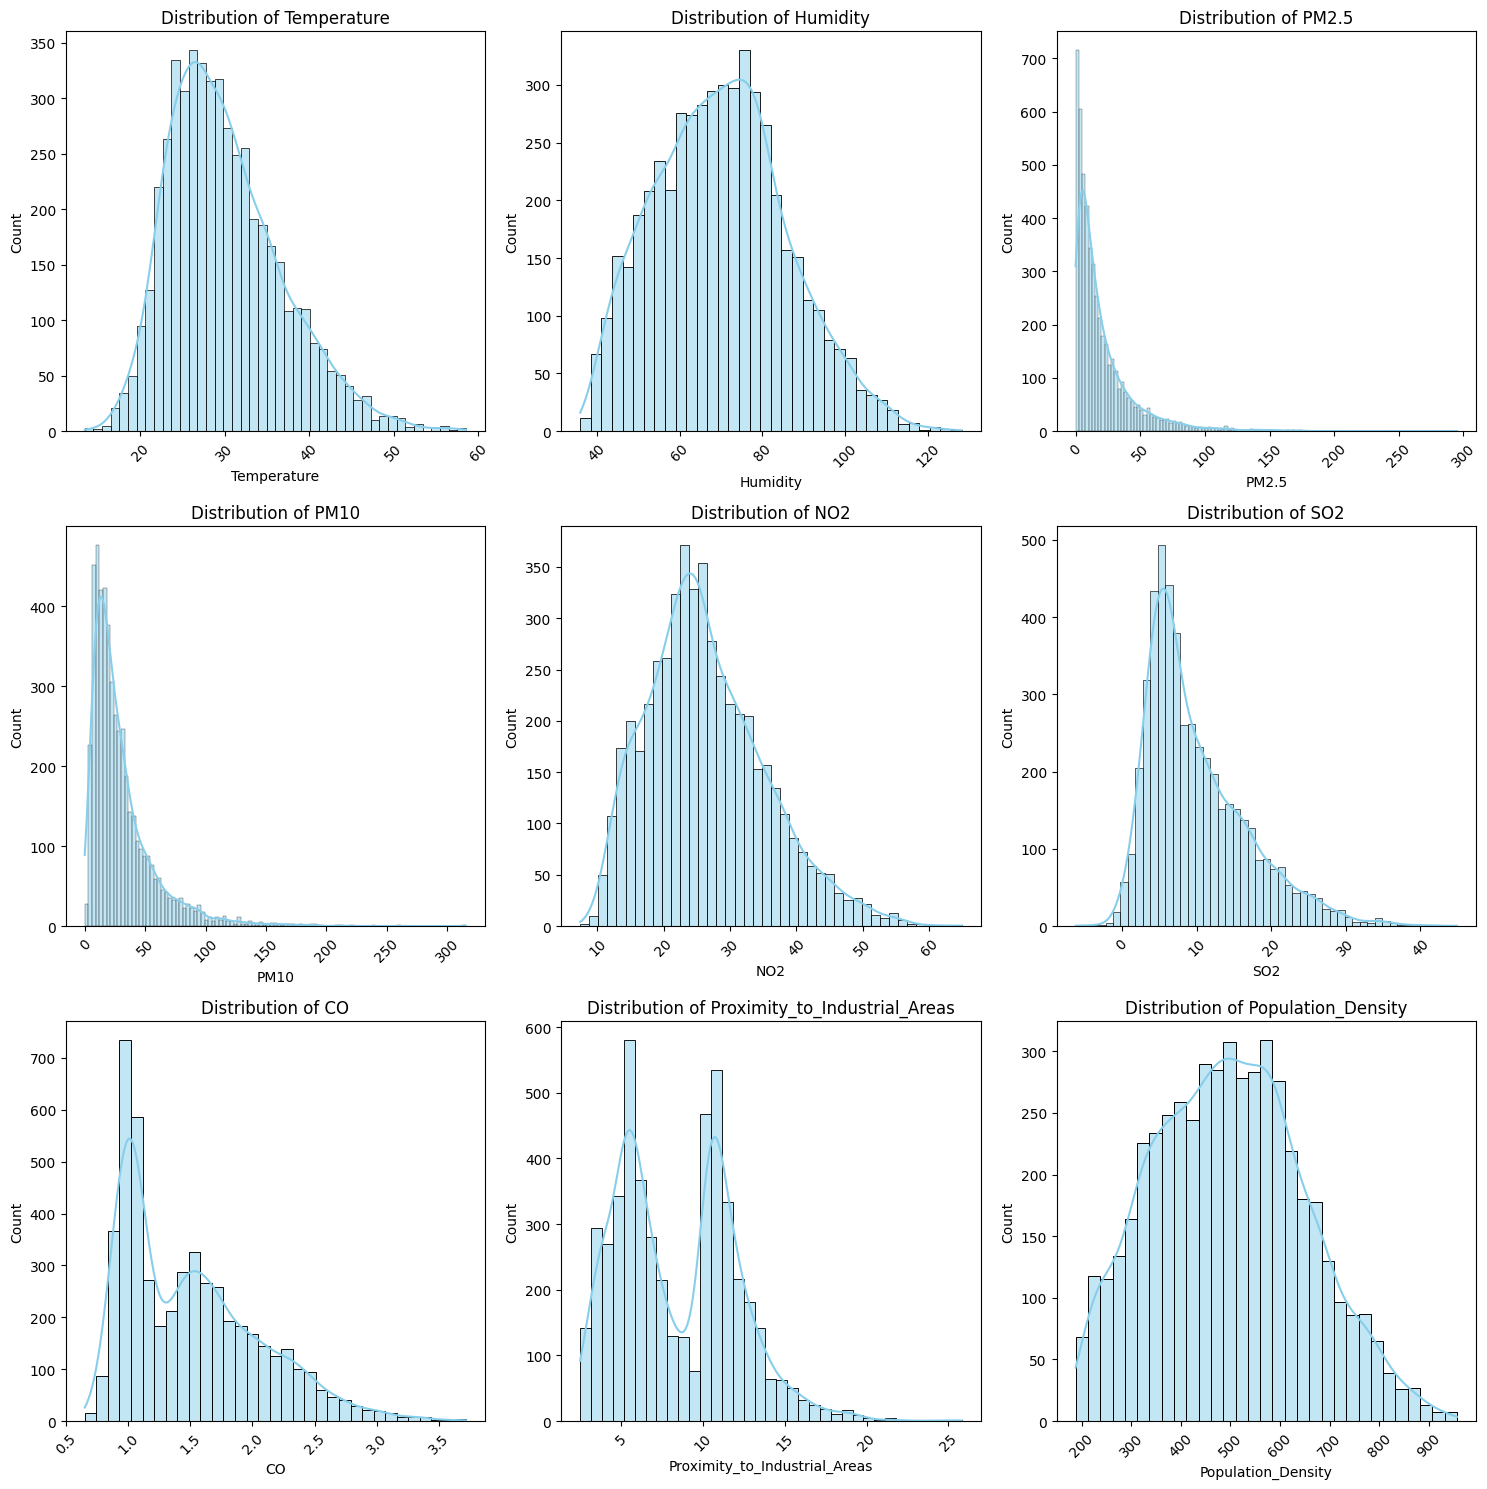

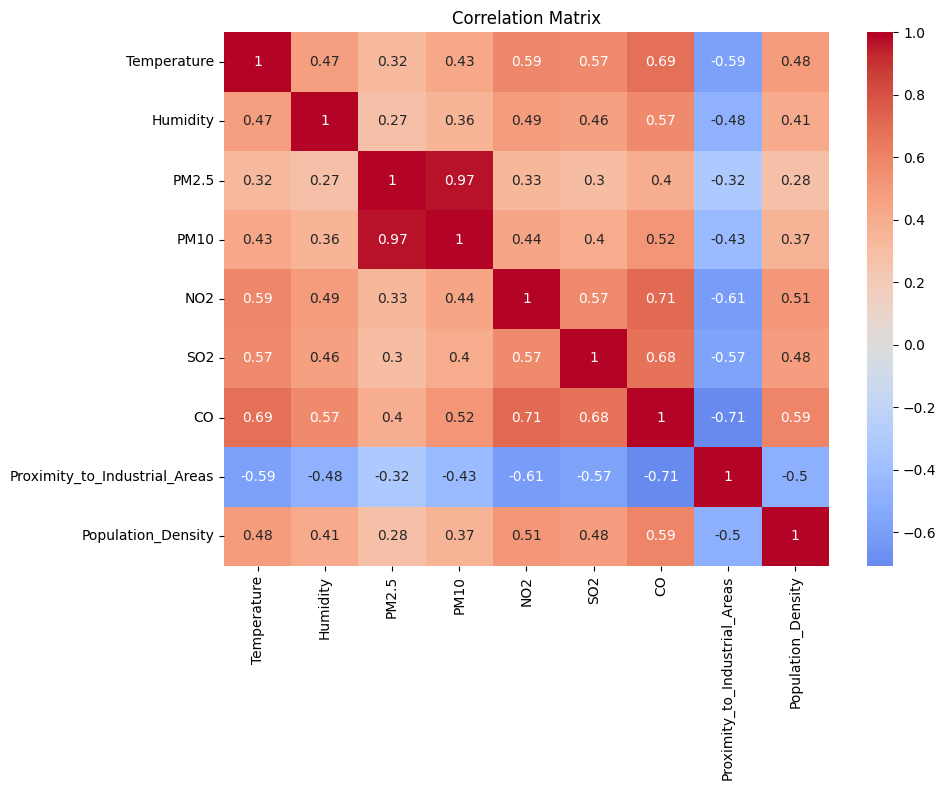

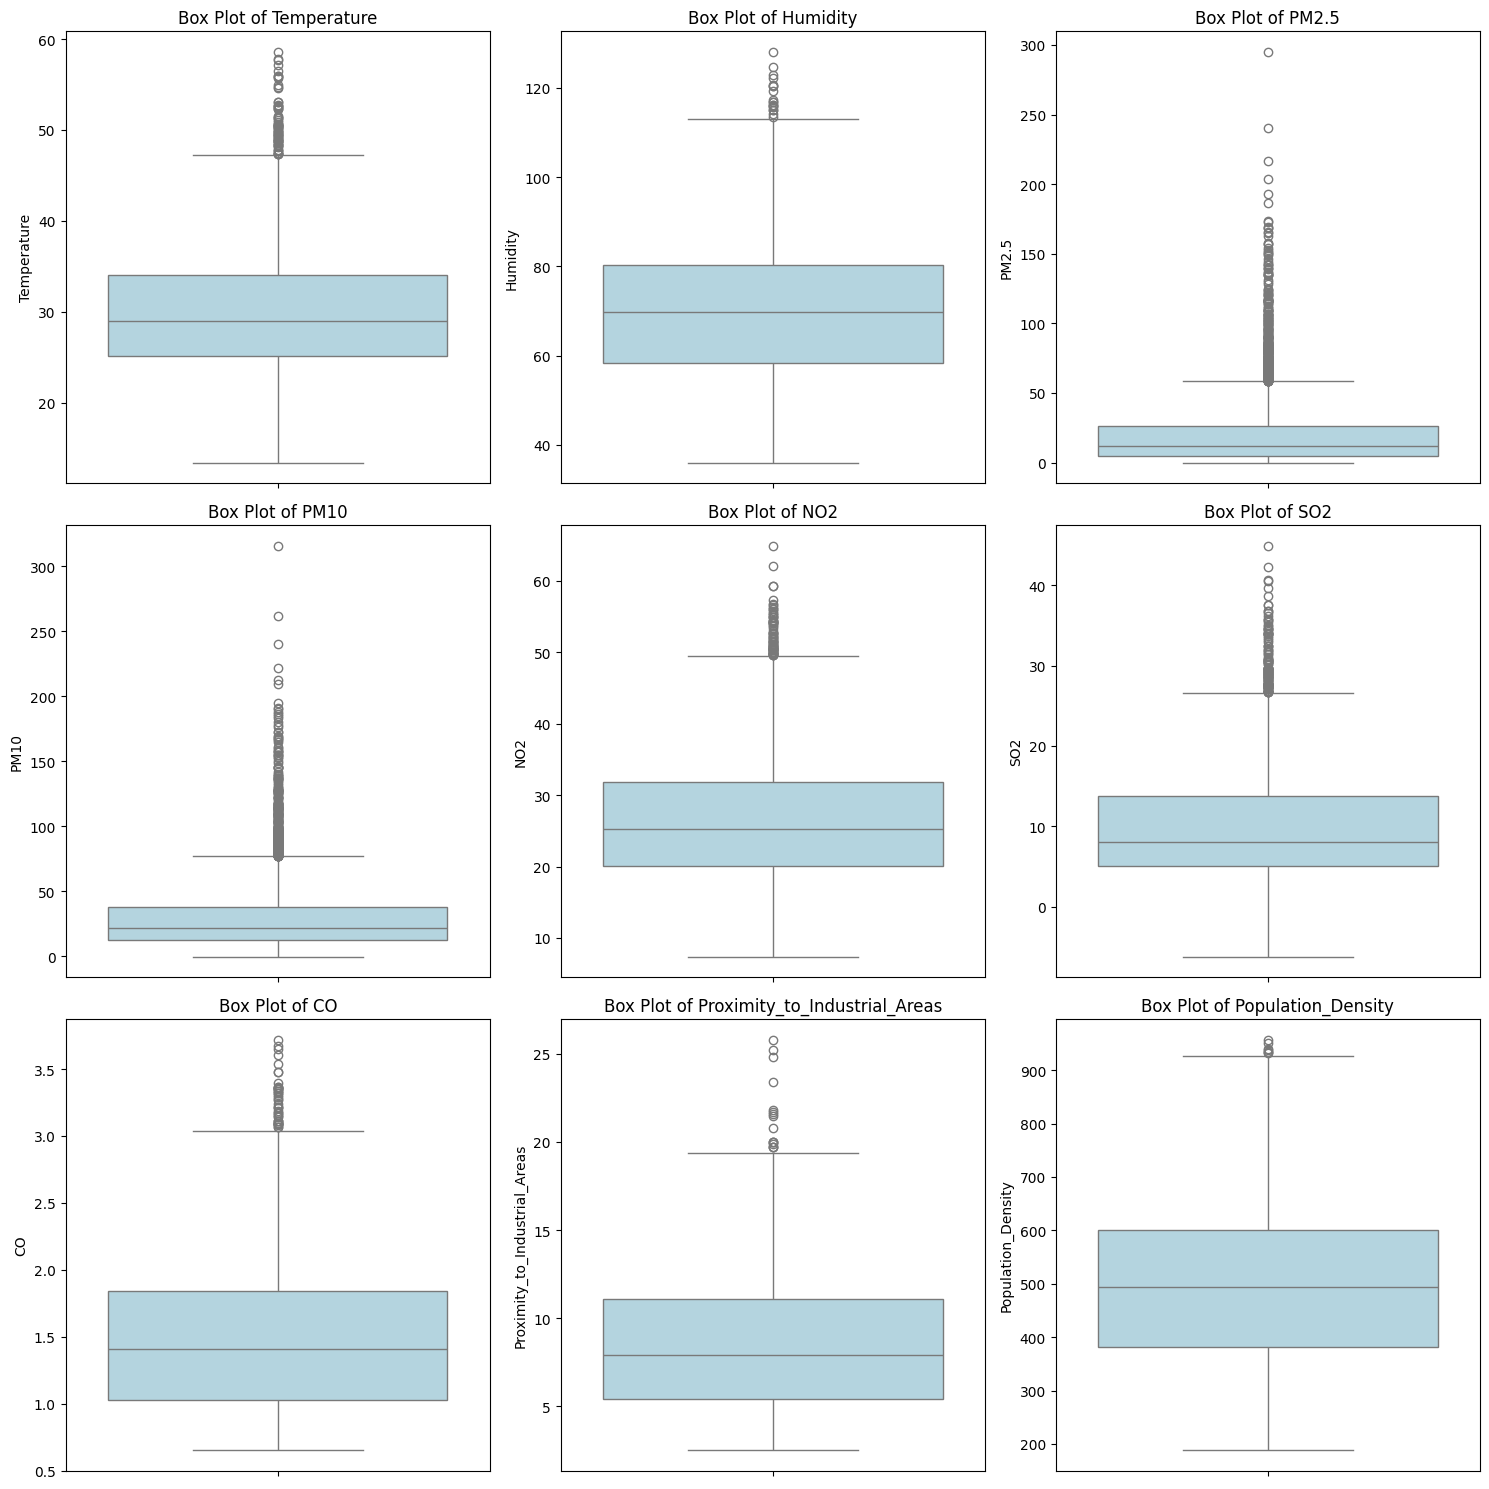

C:\Users\arsha\AppData\Local\Temp\ipykernel_2496\3545304753.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_variable, y=col, data=ds, palette="coolwarm")
C:\Users\arsha\AppData\Local\Temp\ipykernel_2496\3545304753.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_variable, y=col, data=ds, palette="coolwarm")
C:\Users\arsha\AppData\Local\Temp\ipykernel_2496\3545304753.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_variable, y=col, data=ds, palette="coolwarm")
C:\Users\arsha\AppData\Local\Temp\ipykernel

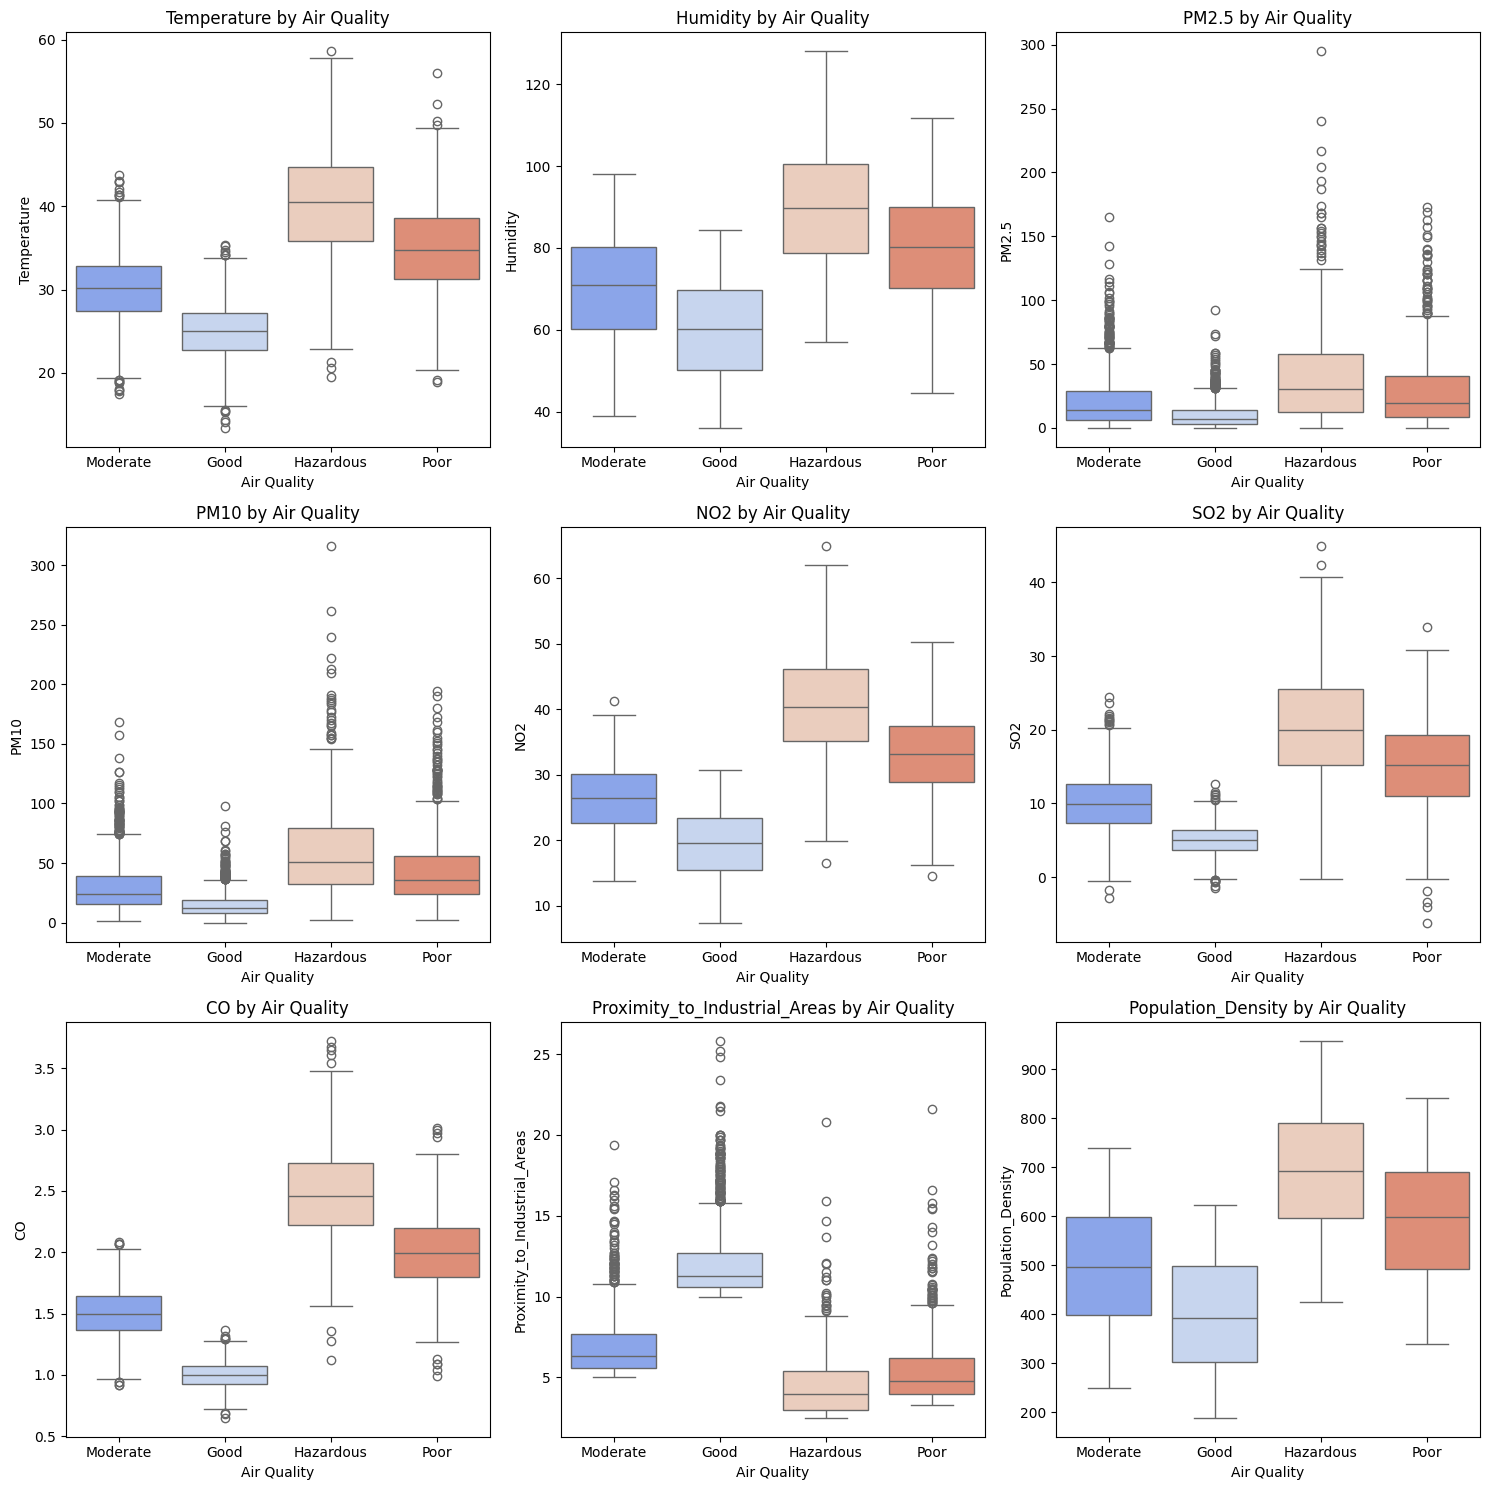

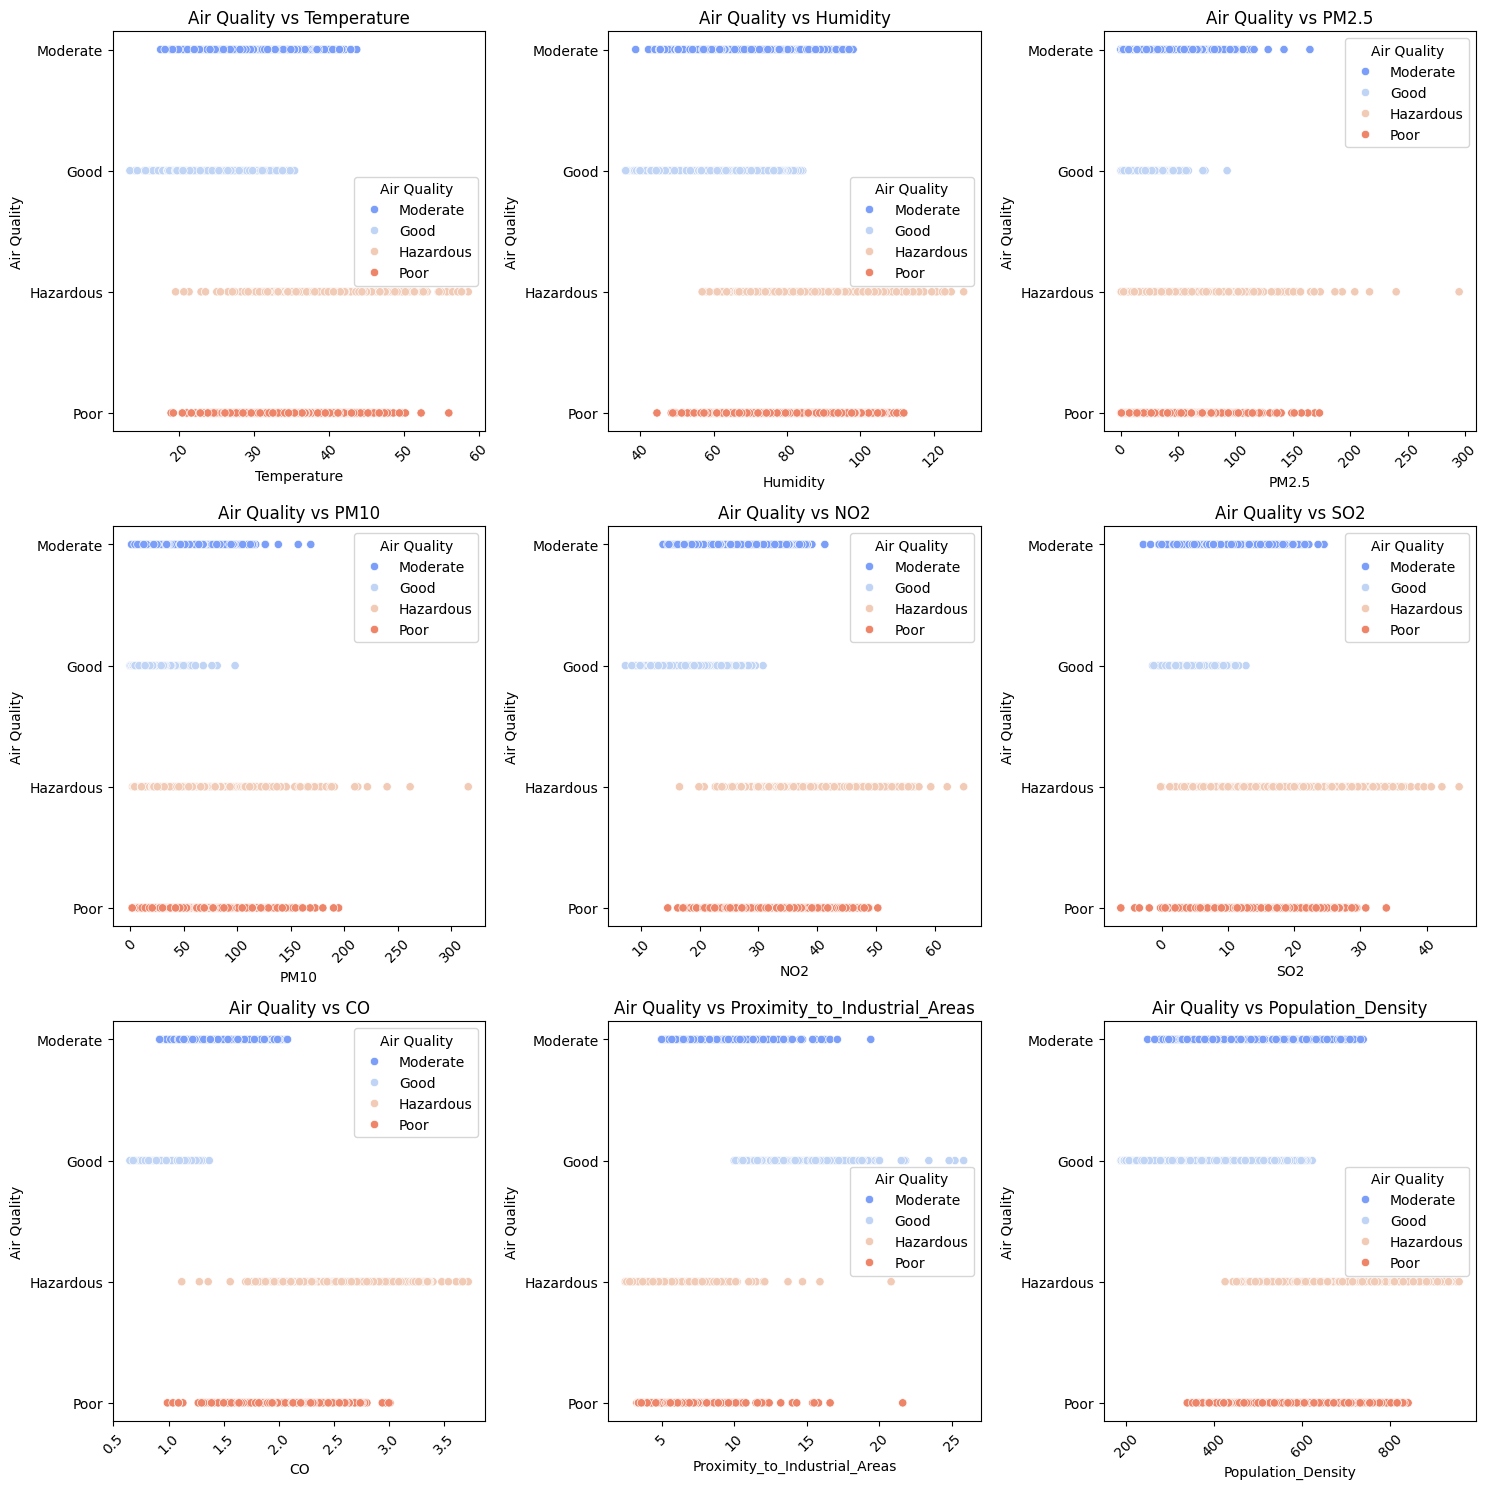


Correlation with Air Quality Levels:
Temperature: Correlation=0.7505, p-value=0.0000
Humidity: Correlation=0.6036, p-value=0.0000
PM2.5: Correlation=0.4084, p-value=0.0000
PM10: Correlation=0.6328, p-value=0.0000
NO2: Correlation=0.7775, p-value=0.0000
SO2: Correlation=0.7440, p-value=0.0000
CO: Correlation=0.9190, p-value=0.0000
Proximity_to_Industrial_Areas: Correlation=-0.8333, p-value=0.0000
Population_Density: Correlation=0.6195, p-value=0.0000


In [18]:
# Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Numerical Features
numerical_features = [
    'Temperature', 'Humidity', 'PM2.5', 'PM10', 
    'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 
    'Population_Density'
]

print("Exploratory Data Analysis (EDA)")
print("-" * 50)

# 1. Basic Data Overview
print("\n1. Basic Data Information:")
print("\nDataset Shape:", ds.shape)
print("\nData Types:")
print(ds.dtypes)
print("\nMissing Values:")
print(ds.isnull().sum())

# 2. Descriptive Statistics
print("\n2. Descriptive Statistics:")
print(ds[numerical_features].describe().round(2))

# 3. Target Variable Analysis
target_variable = 'Air Quality'
if target_variable in ds.columns:
    print(f"\n3. Target Variable ({target_variable}) Distribution:")
    print(ds[target_variable].value_counts())
    print(f"Percentage Distribution:")
    print((ds[target_variable].value_counts(normalize=True) * 100).round(2))
else:
    raise KeyError(f"Target variable '{target_variable}' not found in the dataset.")

# 4. Numerical Variables Distribution
plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(ds[col], kde=True, color="skyblue")
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Correlation Analysis
plt.figure(figsize=(10, 8))
correlation_matrix = ds[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# 6. Box Plots for Outlier Detection
plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=ds[col], color="lightblue")
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

# 7. Target Variable vs Numerical Features
plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=target_variable, y=col, data=ds, palette="coolwarm")
    plt.title(f'{col} by {target_variable}')
plt.tight_layout()
plt.show()

# 8. Scatter Plots for Key Relationships
plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=col, y=target_variable, data=ds, hue=target_variable, palette="coolwarm")
    plt.title(f'{target_variable} vs {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Correlation Analysis with Target
print("\nCorrelation with Air Quality Levels:")
# Converting Target Variable to Ordinal (e.g., Good=1, Moderate=2, Poor=3, Hazardous=4)
ordinal_map = {'Good': 1, 'Moderate': 2, 'Poor': 3, 'Hazardous': 4}
if ds[target_variable].dtype == object:
    ds['Air_Quality_Ordinal'] = ds[target_variable].map(ordinal_map)
else:
    ds['Air_Quality_Ordinal'] = ds[target_variable]

for col in numerical_features:
    correlation, p_value = stats.spearmanr(ds[col], ds['Air_Quality_Ordinal'])
    print(f"{col}: Correlation={correlation:.4f}, p-value={p_value:.4f}")


In [19]:
print("\nMissing values after imputation:")
print(ds.isnull().sum())


Missing values after imputation:
Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
Air_Quality_Ordinal              0
dtype: int64


Outlier Treatment

In [20]:
from scipy.stats import zscore
z_scores = ds[numerical_features].apply(zscore)
outliers = (z_scores.abs() > 3).any(axis=1)
print("Outliers Detected:", outliers.sum())


Outliers Detected: 259


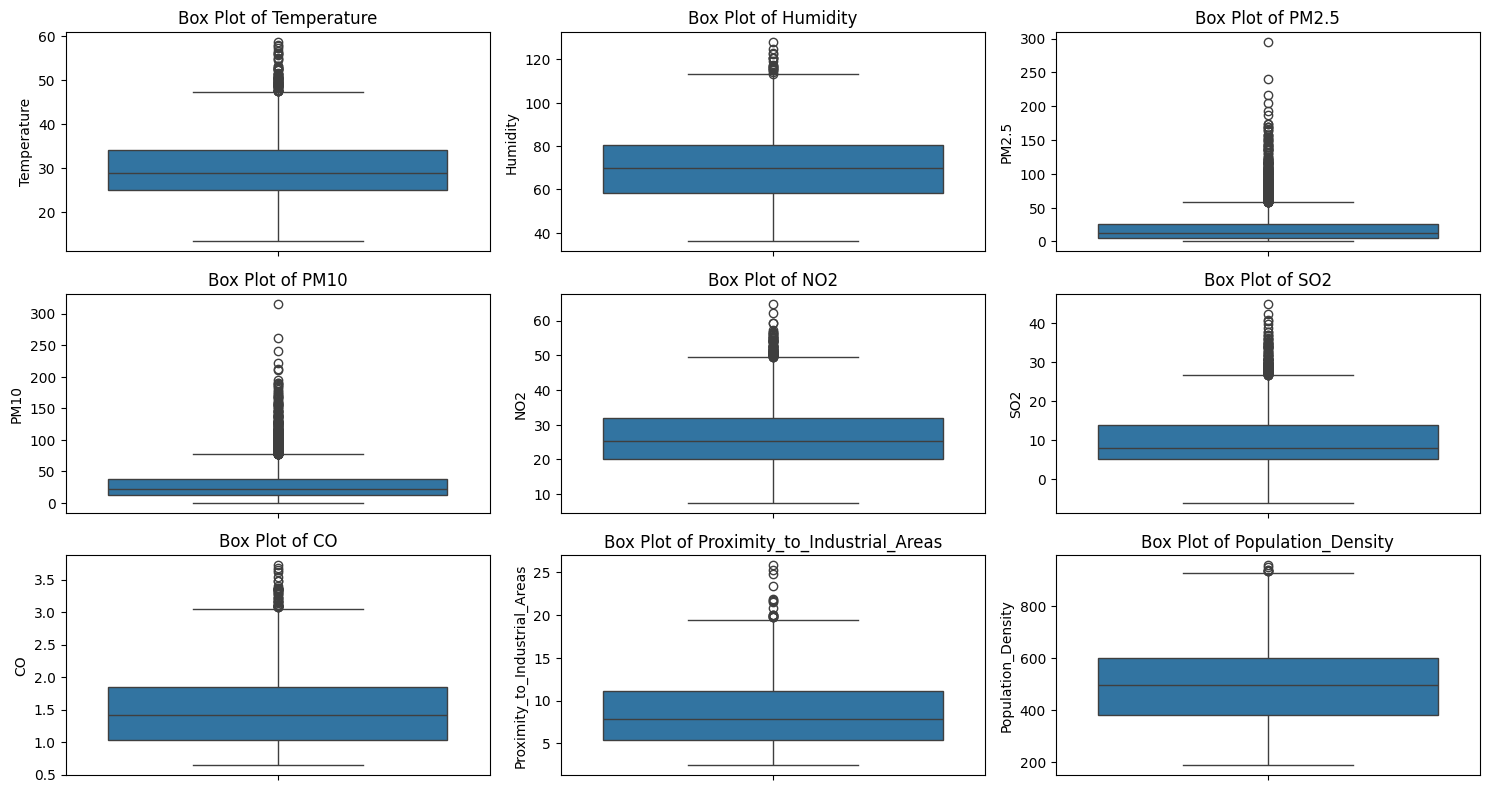

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=ds[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()


In [23]:
for col in numerical_features:
    lower_limit = ds[col].quantile(0.01)
    upper_limit = ds[col].quantile(0.99)
    ds[col] = ds[col].clip(lower=lower_limit, upper=upper_limit)


Outliners Treated. After Treatment Distribution Visulization

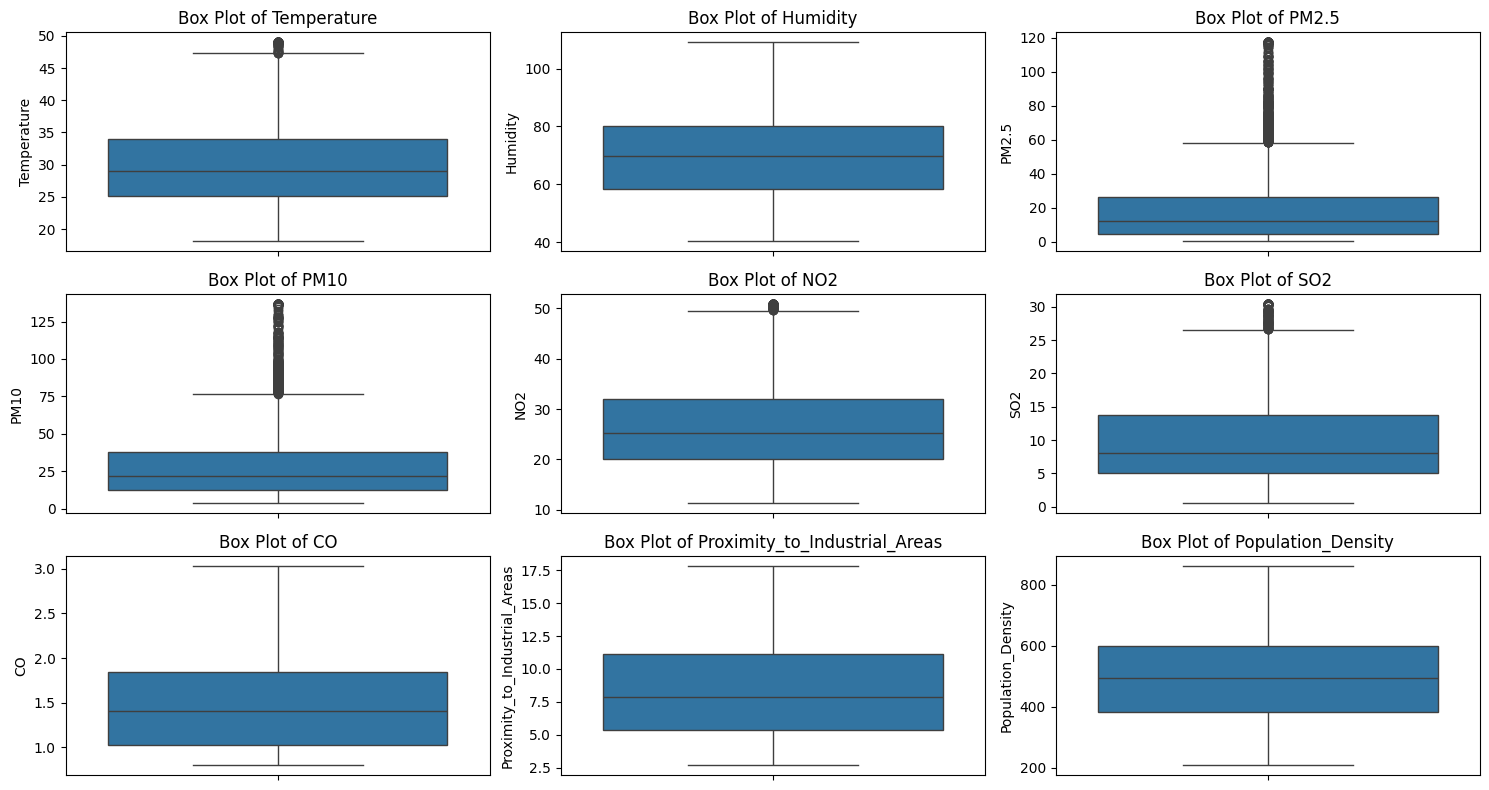

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=ds[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()


## Feature Engineering

### 1. Pollution Severity Index
- Combines the **PM2.5** and **PM10** pollutant concentrations to measure overall pollution severity.  
- **Purpose:**  
  Captures the combined impact of fine (PM2.5) and coarse (PM10) particulate matter on air quality.

### 2. Population-Pollution Interaction
- Measures the interaction between population density and pollution levels to estimate exposure risk.  
- **Purpose:**  
  Highlights regions where large populations are exposed to higher pollution levels.

### 3. Climate Index
- Integrates various climate-related factors such as temperature, humidity, and wind speed.  
- **Purpose:**  
  Provides a single metric representing climate conditions' influence on pollution dispersion and severity.

In [25]:
ds['PM_Severity_Index'] = ds['PM2.5'] + ds['PM10']
ds['Pollution_Population_Impact'] = ds['Population_Density'] * (ds['PM2.5'] + ds['PM10'])
ds['Climate_Index'] = ds['Temperature'] * ds['Humidity']


In [26]:
ds = ds.drop('Air Quality', axis=1)
ds.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air_Quality_Ordinal,PM_Severity_Index,Pollution_Population_Impact,Climate_Index
0,29.8,59.100,5.2,17.9,18.9,9.2,1.72,6.3,319,2,23.1,7368.9,1761.1800
1,28.3,75.600,2.3,12.2,30.8,9.7,1.64,6.0,611,2,14.5,8859.5,2139.4800
2,23.1,74.700,26.7,33.8,24.4,12.6,1.63,5.2,619,2,60.5,37449.5,1725.5700
3,27.1,40.299,6.1,6.3,13.5,5.3,1.15,11.1,551,1,12.4,6832.4,1092.1029
4,26.5,70.700,6.9,16.0,21.9,5.6,1.01,12.7,303,1,22.9,6938.7,1873.5500


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import numpy as np
import pandas as pd

feature_cols = ['Temperature', 'Humidity', 'PM2.5', 'PM10','NO2', 'SO2','CO','Proximity_to_Industrial_Areas','Population_Density','PM_Severity_Index','Pollution_Population_Impact','Climate_Index']  
target_col = 'Air_Quality_Ordinal' 

X = ds[feature_cols]
y = ds[target_col]

# Prepare data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate_model(model, X_train, X_test, y_train, y_test, needs_scaling=False):
    """Evaluate a model with multiple metrics."""
    if needs_scaling:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    
    # Fit and predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate ROC AUC score for multi-class
    try:
        y_pred_proba = model.predict_proba(X_test)
        auc_roc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    except (AttributeError, ValueError):
        auc_roc = None
    
    return {
        'Accuracy': accuracy,
        'ROC AUC': auc_roc,
        'Classification Report': classification_report(y_test, y_pred)
    }


# Define models
models = {
    'Logistic Regression': (LogisticRegression(multi_class='ovr', solver='liblinear', random_state=42), True),
    'Decision Tree': (DecisionTreeClassifier(random_state=42), False),
    'Random Forest': (RandomForestClassifier(random_state=42), False),
    'Gradient Boosting': (GradientBoostingClassifier(random_state=42), False),
    'SVM': (SVC(probability=True, random_state=42), True)
}

# Evaluate all models
results = {}
for name, (model, needs_scaling) in models.items():
    print(f"\n{name} Results:")
    metrics = evaluate_model(model, X_train, X_test, y_train, y_test, needs_scaling)
    results[name] = metrics
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"ROC AUC: {metrics['ROC AUC']:.4f}" if metrics['ROC AUC'] else "ROC AUC: N/A")
    print("\nClassification Report:")
    print(metrics['Classification Report'])

# Find best performing model
best_model = max(results.items(), key=lambda x: x[1]['Accuracy'])
print(f"\nBest performing model: {best_model[0]} (Accuracy: {best_model[1]['Accuracy']:.4f})")


Logistic Regression Results:
Accuracy: 0.8890
ROC AUC: 0.9753

Classification Report:
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       409
           2       0.82      0.94      0.88       294
           3       0.78      0.64      0.70       186
           4       0.91      0.76      0.83       111

    accuracy                           0.89      1000
   macro avg       0.87      0.83      0.85      1000
weighted avg       0.89      0.89      0.89      1000


Decision Tree Results:


c:\Users\arsha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.9080
ROC AUC: 0.9197

Classification Report:
              precision    recall  f1-score   support

           1       0.99      1.00      1.00       409
           2       0.95      0.90      0.93       294
           3       0.74      0.80      0.77       186
           4       0.77      0.77      0.77       111

    accuracy                           0.91      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.91      0.91      0.91      1000


Random Forest Results:
Accuracy: 0.9600
ROC AUC: 0.9952

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       409
           2       0.97      0.97      0.97       294
           3       0.88      0.91      0.89       186
           4       0.92      0.87      0.90       111

    accuracy                           0.96      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.96      0.96      0.96    

C:\Users\arsha\AppData\Local\Temp\ipykernel_2496\729396821.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=model_df, palette='viridis')


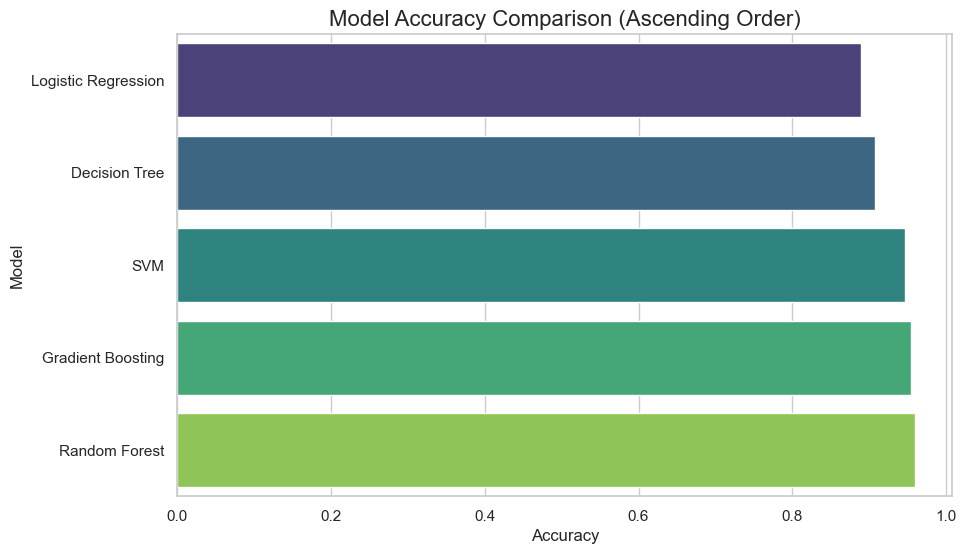

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for models and their accuracies
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVM']
accuracies = [0.8890, 0.9080, 0.9600, 0.9540, 0.9460]

# Create a DataFrame for plotting
model_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies
})

# Sort the DataFrame by Accuracy in ascending order
model_df = model_df.sort_values(by='Accuracy', ascending=True)

# Set the plot size and style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create a bar plot
sns.barplot(x='Accuracy', y='Model', data=model_df, palette='viridis')

# Add titles and labels
plt.title('Model Accuracy Comparison (Ascending Order)', fontsize=16)
plt.xlabel('Accuracy', fontsize=12)
plt.ylabel('Model', fontsize=12)

# Display the plot
plt.show()


C:\Users\arsha\AppData\Local\Temp\ipykernel_2496\3735415266.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


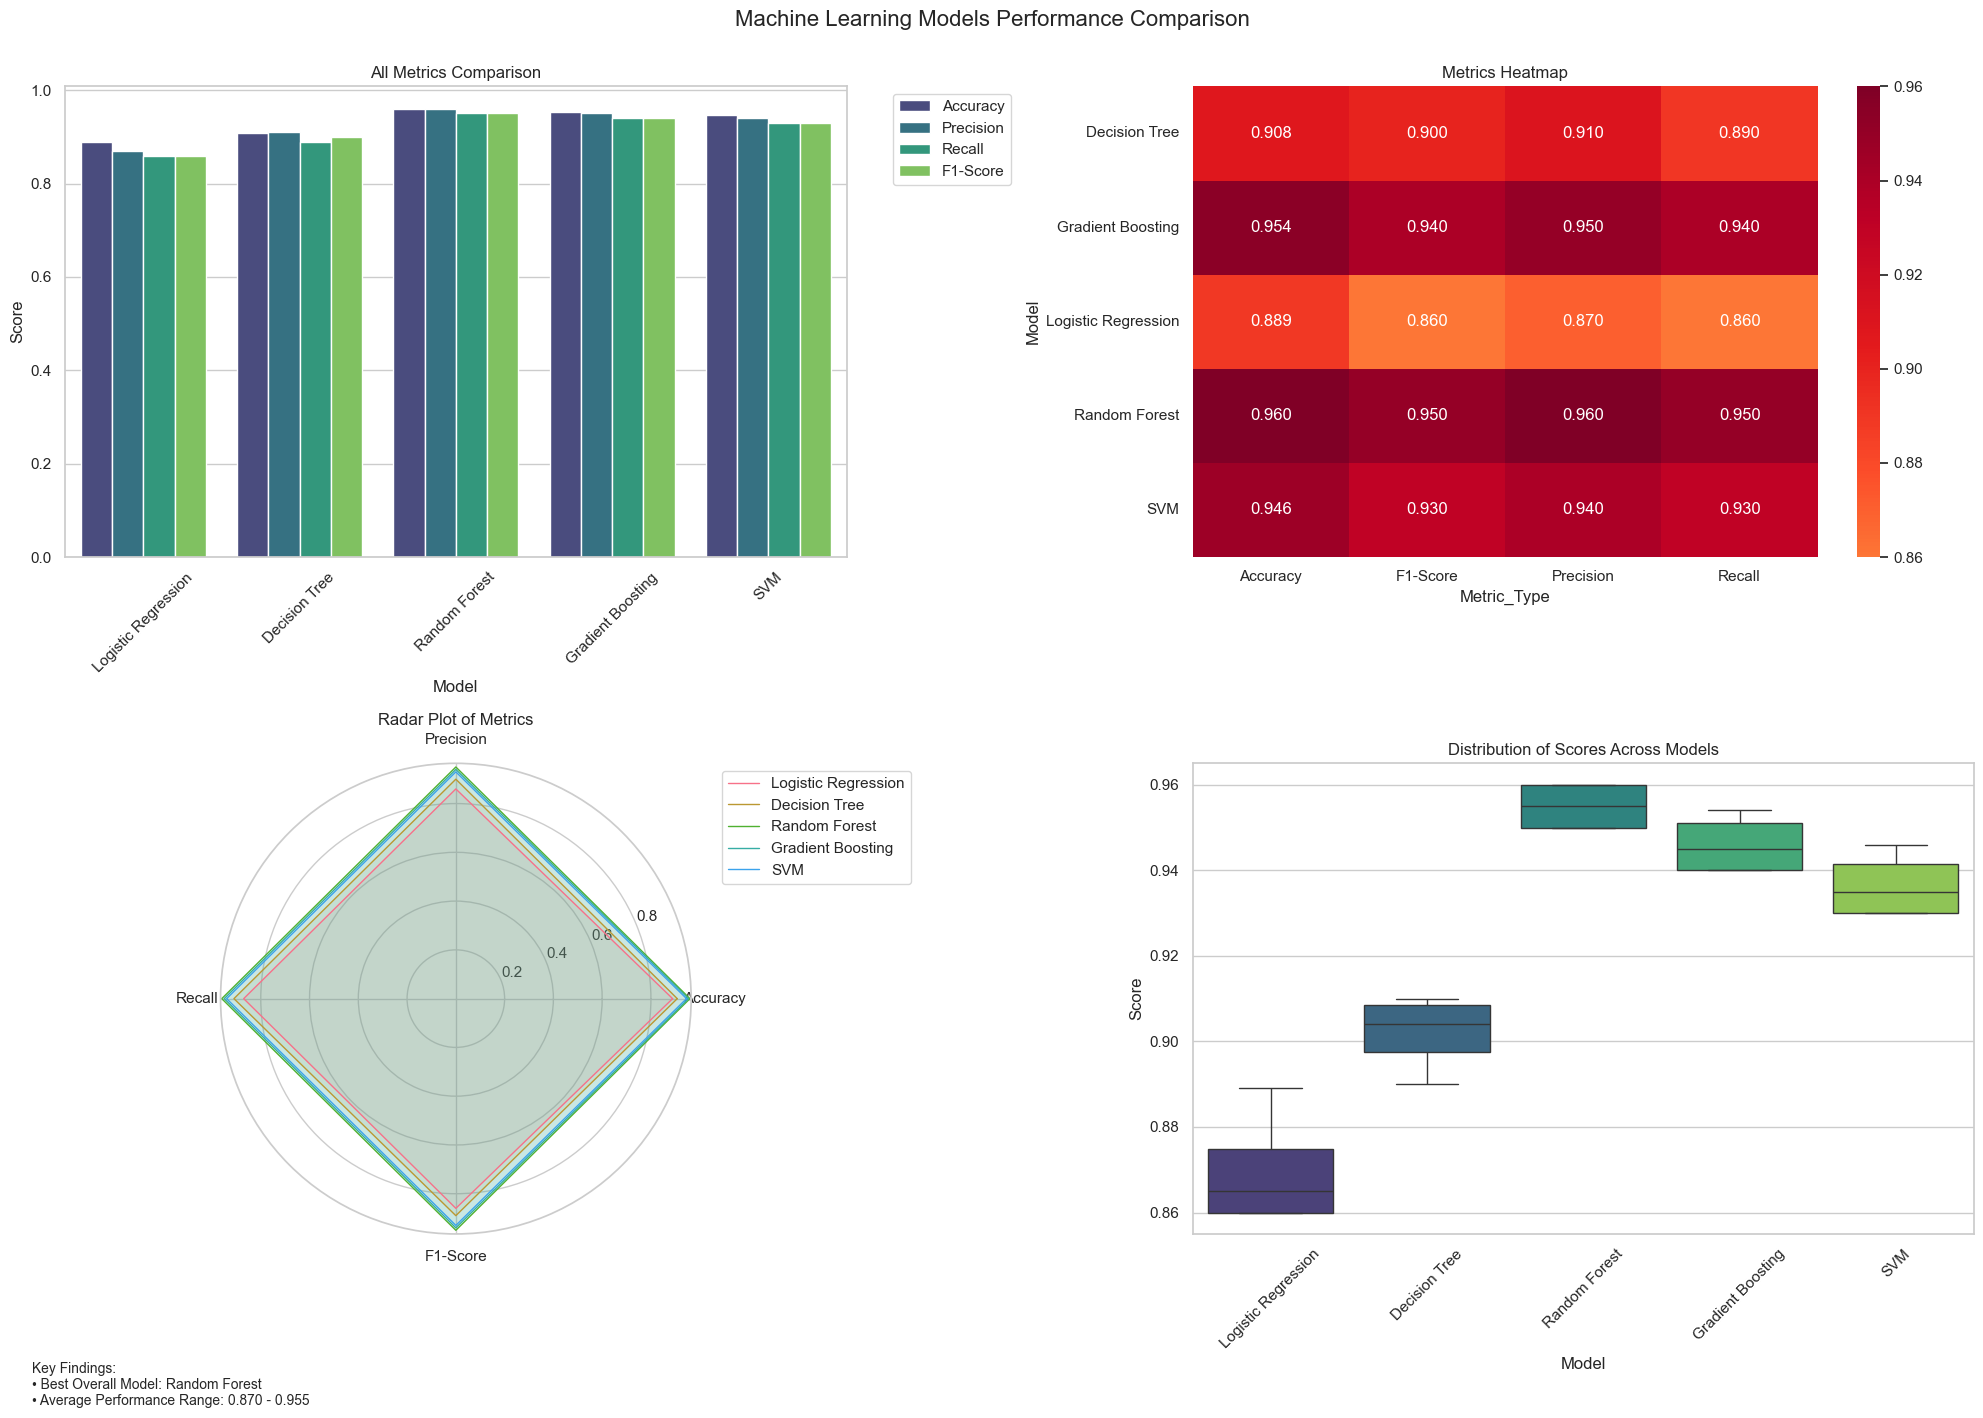


Detailed Statistics:
                      Score                     
                       mean     std   min    max
Model                                           
Decision Tree        0.9020  0.0091  0.89  0.910
Gradient Boosting    0.9460  0.0071  0.94  0.954
Logistic Regression  0.8698  0.0137  0.86  0.889
Random Forest        0.9550  0.0058  0.95  0.960
SVM                  0.9365  0.0079  0.93  0.946


In [31]:
import matplotlib.pyplot as plt  
import seaborn as sns  
import pandas as pd  
import numpy as np  
  
# Sample metrics data
metrics_data = {  
   'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVM'] * 4,  
   'Metric_Type': ['Accuracy'] * 5 + ['Precision'] * 5 + ['Recall'] * 5 + ['F1-Score'] * 5,  
   'Score': [  
      # Accuracy scores  
      0.8890, 0.9080, 0.9600, 0.9540, 0.9460,  
      # Precision scores 
      0.87, 0.91, 0.96, 0.95, 0.94,  
      # Recall scores   
      0.86, 0.89, 0.95, 0.94, 0.93,  
      # F1-scores 
      0.86, 0.90, 0.95, 0.94, 0.93  
   ]  
}  
  
# Create DataFrame  
metrics_df = pd.DataFrame(metrics_data)  
  
# Set style  
sns.set_style("whitegrid")  
sns.set_palette("husl")  
  
# Create subplots for different visualizations  
fig = plt.figure(figsize=(20, 15))  
fig.suptitle('Machine Learning Models Performance Comparison', fontsize=16, y=0.95)  
  
# 1. Bar plot for all metrics  
plt.subplot(2, 2, 1)  
sns.barplot(  
   data=metrics_df,  
   x='Model',  
   y='Score',  
   hue='Metric_Type',  
   palette='viridis'  
)  
plt.title('All Metrics Comparison')  
plt.xticks(rotation=45)  
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  
  
# 2. Heatmap  
pivot_df = metrics_df.pivot(index='Model', columns='Metric_Type', values='Score')  
plt.subplot(2, 2, 2)  
sns.heatmap(  
   pivot_df,  
   annot=True,  
   fmt='.3f',  
   cmap='YlOrRd',  
   center=0.85  
)  
plt.title('Metrics Heatmap')  
  
# 3. Radar/Spider plot  
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']  
num_metrics = len(metrics)  
angles = [n / float(num_metrics) * 2 * np.pi for n in range(num_metrics)]  
angles += angles[:1]  
  
plt.subplot(2, 2, 3, projection='polar')  
for model in metrics_df['Model'].unique():  
   values = pivot_df.loc[model].values.flatten().tolist()  
   values += values[:1]  
   plt.plot(angles, values, linewidth=1, label=model)  
   plt.fill(angles, values, alpha=0.1)  
  
plt.xticks(angles[:-1], metrics)  
plt.title('Radar Plot of Metrics')  
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  
  
# 4. Box plot  
plt.subplot(2, 2, 4)  
sns.boxplot(  
   data=metrics_df,  
   x='Model',  
   y='Score',  
   palette='viridis'  
)  
plt.title('Distribution of Scores Across Models')  
plt.xticks(rotation=45)  
  
# Adjust layout  
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
  
# Add a text box with key findings  
best_model = metrics_df.groupby('Model')['Score'].mean().idxmax()  
avg_scores = metrics_df.groupby('Model')['Score'].mean()  
fig.text(0.02, 0.02,  
      f'Key Findings:\n' +  
      f'• Best Overall Model: {best_model}\n' +  
      f'• Average Performance Range: {avg_scores.min():.3f} - {avg_scores.max():.3f}',  
      fontsize=10,  
      bbox=dict(facecolor='white', alpha=0.8))  
  
plt.show()  
  
# Print detailed statistics  
print("\nDetailed Statistics:")  
stats_df = metrics_df.groupby('Model').agg({  
   'Score': ['mean', 'std', 'min', 'max']  
}).round(4)  
print(stats_df)


In [37]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Define models with their configuration
models = [
    {'name': 'Logistic Regression', 'model': LogisticRegression(), 'needs_scaling': True},
    {'name': 'Random Forest', 'model': RandomForestClassifier(), 'needs_scaling': False},
    {'name': 'SVM', 'model': SVC(probability=True), 'needs_scaling': True},
    {'name': 'Decision Tree', 'model': DecisionTreeClassifier(), 'needs_scaling': False},
    {'name': 'Gradient Boosting', 'model': GradientBoostingClassifier(), 'needs_scaling': False}
]


In [38]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define metrics
accuracy = make_scorer(accuracy_score)
auc_roc = make_scorer(roc_auc_score, multi_class='ovr', needs_proba=True)

# Define cross-validation object
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for each model
for model_info in models:
    name = model_info['name']
    model = model_info['model']
    needs_scaling = model_info['needs_scaling']
    
    print(f"\n{name} Cross-Validation Results:")
    
    if needs_scaling:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring=accuracy)
        try:
            auc_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring=auc_roc)
        except (AttributeError, ValueError):
            auc_scores = None
    else:
        scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=accuracy)
        try:
            auc_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=auc_roc)
        except (AttributeError, ValueError):
            auc_scores = None

    print(f"Accuracy: {np.mean(scores):.4f} +/- {np.std(scores):.4f}")
    if auc_scores is not None:
        print(f"ROC AUC: {np.mean(auc_scores):.4f} +/- {np.std(auc_scores):.4f}")
    else:
        print("ROC AUC: N/A")


c:\Users\arsha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(



Logistic Regression Cross-Validation Results:
Accuracy: 0.9393 +/- 0.0056
ROC AUC: 0.9911 +/- 0.0023

Random Forest Cross-Validation Results:
Accuracy: 0.9555 +/- 0.0073
ROC AUC: 0.9922 +/- 0.0018

SVM Cross-Validation Results:
Accuracy: 0.9398 +/- 0.0094
ROC AUC: 0.9917 +/- 0.0022

Decision Tree Cross-Validation Results:
Accuracy: 0.9180 +/- 0.0101
ROC AUC: 0.9287 +/- 0.0056

Gradient Boosting Cross-Validation Results:
Accuracy: 0.9512 +/- 0.0057
ROC AUC: 0.9929 +/- 0.0017


# Model Results Interpretation

## Logistic Regression
- **Accuracy:** 0.9393 ± 0.0056  
  Logistic Regression correctly classifies about **93.93%** of the samples, with minimal variability (**±0.56%**).
- **ROC AUC:** 0.9911 ± 0.0023  
  The model is very good at distinguishing between classes (**99.11%**).  
  Minimal variability (**±0.23%**) indicates the model generalizes consistently across folds.

---

## Random Forest
- **Accuracy:** 0.9555 ± 0.0073  
  Random Forest outperforms Logistic Regression with a higher accuracy (**95.55%**).  
  Variability (**±0.73%**) is slightly higher, indicating minor inconsistencies in performance across folds.
- **ROC AUC:** 0.9922 ± 0.0018  
  Random Forest achieves an impressive ROC AUC (**99.22%**), indicating excellent class discrimination ability.  
  Low variability (**±0.18%**) suggests a stable model.

---

## SVM
- **Accuracy:** 0.9398 ± 0.0094  
  SVM performs similarly to Logistic Regression in accuracy (**93.98%**) but has higher variability (**±0.94%**).
- **ROC AUC:** 0.9917 ± 0.0022  
  SVM's ROC AUC (**99.17%**) is slightly better than Logistic Regression but lower than Random Forest.  
  Variability is low (**±0.22%**), indicating stable performance.

---

## Decision Tree
- **Accuracy:** 0.9180 ± 0.0101  
  Decision Tree has the lowest accuracy (**91.80%**) among the models, with higher variability (**±1.01%**) across folds.
- **ROC AUC:** 0.9287 ± 0.0056  
  The ROC AUC (**92.87%**) indicates weaker class discrimination compared to other models.  
  Higher variability (**±0.56%**) suggests inconsistent performance across folds.

---

## Gradient Boosting
- **Accuracy:** 0.9512 ± 0.0057  
  Gradient Boosting performs close to Random Forest, with a high accuracy (**95.12%**) and low variability (**±0.57%**).
- **ROC AUC:** 0.9929 ± 0.0017  
  Gradient Boosting has one of the highest ROC AUC values (**99.29%**), slightly outperforming Random Forest in class discrimination.  
  Low variability (**±0.17%**) suggests consistent performance across folds.

---

# Which Model is Best?
From the results:
- **Random Forest** performs the best overall in terms of accuracy (**95.55%**) and is very competitive in ROC AUC (**99.22%**).
- **Gradient Boosting** comes very close to Random Forest, achieving slightly better ROC AUC (**99.29%**) but marginally lower accuracy (**95.12%**).
- **Logistic Regression** and **SVM** perform comparably, with slightly lower accuracy and AUC compared to the ensemble methods.
- **Decision Tree** underperforms compared to other models and shows higher variability.

---

# Variability Analysis
- **Gradient Boosting** has the lowest variability in both accuracy (**±0.57%**) and ROC AUC (**±0.17%**), suggesting consistent and reliable performance.
- **Random Forest** also exhibits low variability, indicating robustness across folds.
- **Decision Tree** has the highest variability, reflecting inconsistency in performance.
- **SVM** shows slightly higher variability in accuracy compared to Logistic Regression, indicating sensitivity to dataset splits.

---

# Summary of Insights
- **Random Forest** is the most robust and best-performing model for this dataset, with the highest accuracy and competitive ROC AUC.  
- **Gradient Boosting** offers slightly better ROC AUC but marginally lower accuracy, making it a close contender.  
- **Logistic Regression** is simpler and performs well but lags behind the ensemble methods in both accuracy and AUC.  
- **SVM** performs comparably to Logistic Regression but has slightly higher variability in accuracy.  
- **Decision Tree** is less reliable and performs poorly compared to other models.

> If computational resources are limited or interpretability is critical, **Logistic Regression** is a suitable choice.  
> For maximizing predictive performance and robustness, **Random Forest** or **Gradient Boosting** should be preferred.
